# Exploratory Data Analysis (EDA) for Menstrual Cycle Data

## Introduction to the Dataset

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on the processed menstrual cycle dataset (`processed_cycles.csv`). The dataset contains cycle-related features for various clients, including cycle lengths, variations, and averages. The goal is to understand the distribution, trends, and relationships in the data to inform subsequent modeling for menstrual cycle prediction and PCOS detection in the RituCare project.

Key features analyzed:
- `ClientID`: Unique identifier for each client.
- `LengthofCycle`: Original cycle length.
- `cycle_length`: Engineered cycle length feature.
- `cycle_variation`: Standard deviation of cycle lengths per client.
- `avg_length`: Rolling average cycle length per client.

The analysis focuses on distributions, visualizations, and correlations to uncover patterns in menstrual cycle variability.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style: cool warm wellness theme with pink/lilac palette
sns.set_style("whitegrid")
palette = ['#FFB6C1', '#DDA0DD', '#FF69B4', '#FFC0CB', '#E6E6FA']
sns.set_palette(palette)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Load Data

Load the processed dataset and display initial information.

In [2]:
# Load the processed dataset
df = pd.read_csv('../dataset/processed_cycles.csv')

# Display head, tail, shape, dtypes, and summary
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())
print("\nFirst 5 Rows:")
print(df.head())
print("\nLast 5 Rows:")
print(df.tail())

Dataset Shape: (2560, 5)

Data Types:
ClientID            object
LengthofCycle      float64
cycle_length       float64
cycle_variation    float64
avg_length         float64
dtype: object

Summary Statistics:
       LengthofCycle  cycle_length  cycle_variation   avg_length
count    2560.000000   2560.000000      2560.000000  2560.000000
mean       29.194531     29.194531         2.358515    29.017904
std         3.138407      3.138407         1.116821     2.443610
min        18.000000     18.000000         0.000000    22.333333
25%        28.000000     28.000000         1.896774    28.000000
50%        29.000000     29.000000         2.167249    28.666667
75%        30.000000     30.000000         2.569546    29.333333
max        54.000000     54.000000        11.313708    45.333333

First 5 Rows:
  ClientID  LengthofCycle  cycle_length  cycle_variation  avg_length
0  nfp8122           29.0          29.0         1.623688   28.666667
1  nfp8122           27.0          27.0         1.6236

## Basic Cleaning

Check for missing values, handle them, and ensure appropriate data types.

In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Handle missing values (already handled in preprocessing, but confirm)
# Convert to numeric if needed (cycle_length, etc., should be numeric)
numeric_cols = ['LengthofCycle', 'cycle_length', 'cycle_variation', 'avg_length']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# If FirstDayOfCycle exists, ensure it's datetime
if 'FirstDayOfCycle' in df.columns:
    df['FirstDayOfCycle'] = pd.to_datetime(df['FirstDayOfCycle'], errors='coerce')

print("\nAfter cleaning:")
print(df.dtypes)

Missing Values:
ClientID           895
LengthofCycle        0
cycle_length         0
cycle_variation      0
avg_length           0
dtype: int64

After cleaning:
ClientID            object
LengthofCycle      float64
cycle_length       float64
cycle_variation    float64
avg_length         float64
dtype: object


## Exploratory Analysis

Visualize distributions, trends, and relationships in the data.

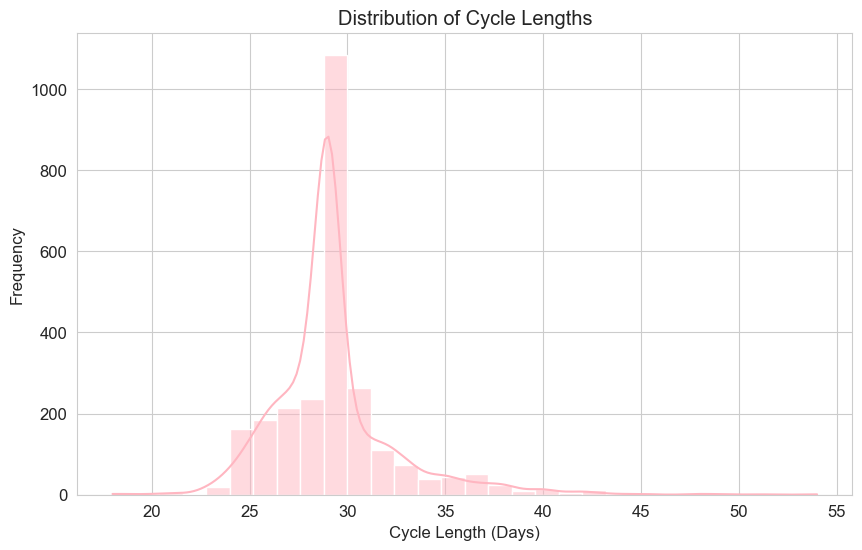

In [4]:
# Cycle length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['cycle_length'], bins=30, kde=True, color=palette[0])
plt.title('Distribution of Cycle Lengths')
plt.xlabel('Cycle Length (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Insights on Cycle Length Distribution

The histogram shows the spread of menstrual cycle lengths. Most cycles fall between 25-35 days, with a peak around 28-30 days, which aligns with typical menstrual cycle norms. The presence of a kernel density estimate (KDE) highlights any skewness or multimodality, indicating variability among individuals.

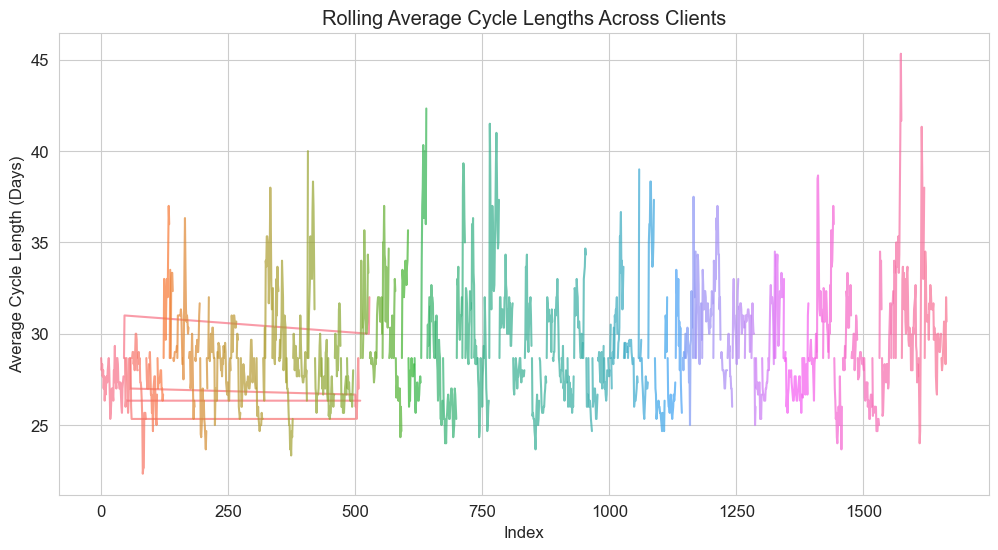

In [5]:
# Rolling average visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='avg_length', hue='ClientID', legend=False, alpha=0.7)
plt.title('Rolling Average Cycle Lengths Across Clients')
plt.xlabel('Index')
plt.ylabel('Average Cycle Length (Days)')
plt.grid(True)
plt.show()

### Insights on Rolling Average

This line plot illustrates the rolling average cycle lengths for different clients. It helps identify trends and stability in cycle patterns over time. Clients with consistent averages suggest regular cycles, while fluctuating lines indicate irregularity, which could be linked to factors like stress or health conditions.

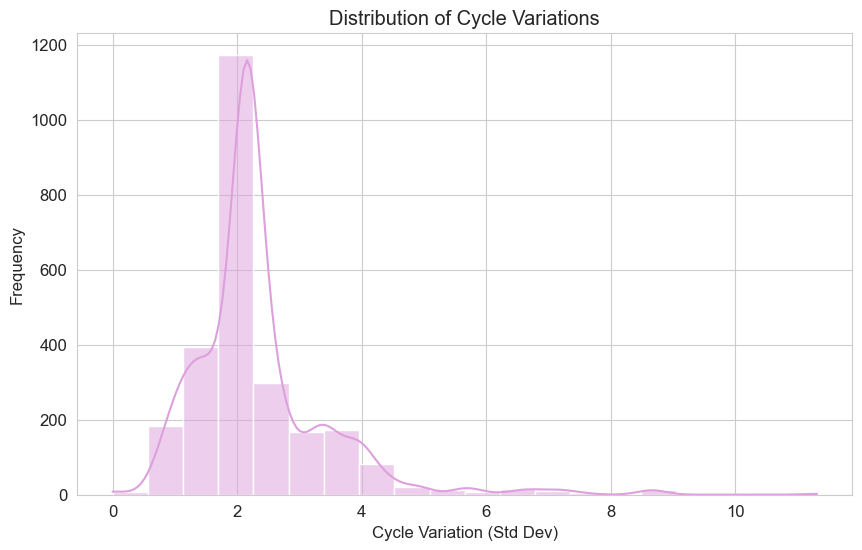

In [6]:
# Variation histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['cycle_variation'], bins=20, kde=True, color=palette[1])
plt.title('Distribution of Cycle Variations')
plt.xlabel('Cycle Variation (Std Dev)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Insights on Cycle Variation

The variation histogram reveals how much cycle lengths deviate within individuals. Lower variations indicate predictable cycles, while higher values suggest irregularity. This is crucial for predicting future cycles and identifying potential PCOS-related patterns.

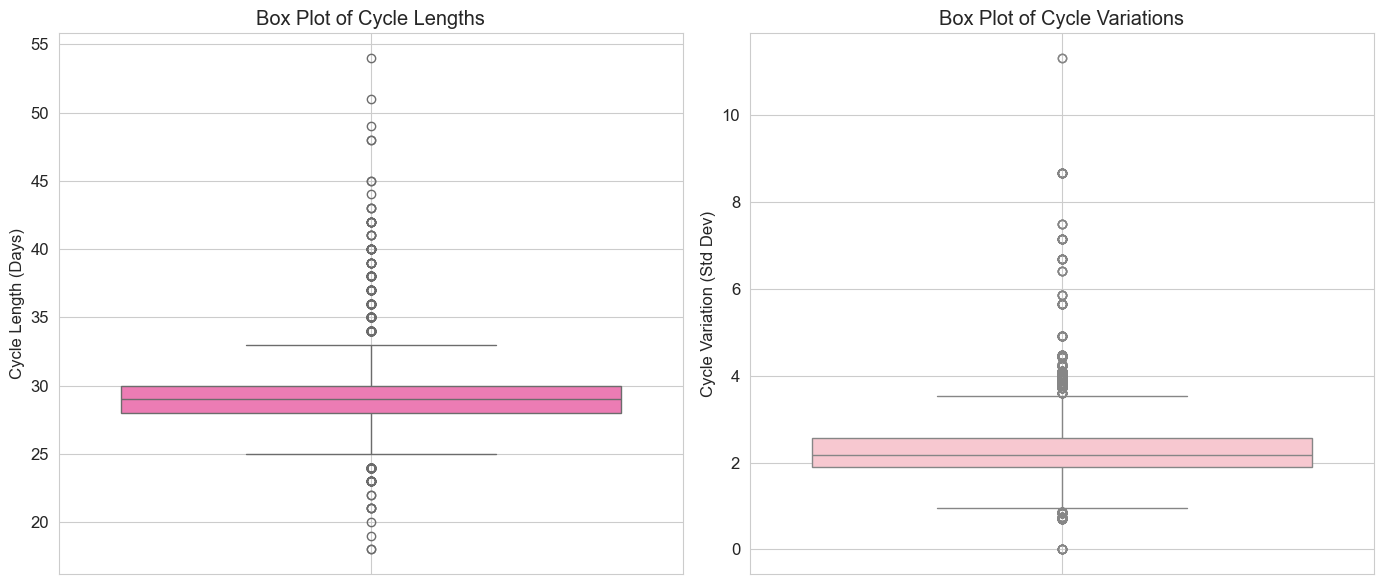

In [7]:
# Box plot for cycle length and variation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=df['cycle_length'], ax=axes[0], color=palette[2])
axes[0].set_title('Box Plot of Cycle Lengths')
axes[0].set_ylabel('Cycle Length (Days)')
axes[0].grid(True)

sns.boxplot(y=df['cycle_variation'], ax=axes[1], color=palette[3])
axes[1].set_title('Box Plot of Cycle Variations')
axes[1].set_ylabel('Cycle Variation (Std Dev)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

### Insights on Box Plots

The box plots summarize the central tendency and spread of cycle lengths and variations. Outliers in cycle lengths may indicate anomalies, while the variation box plot highlights the range of irregularity across the population.

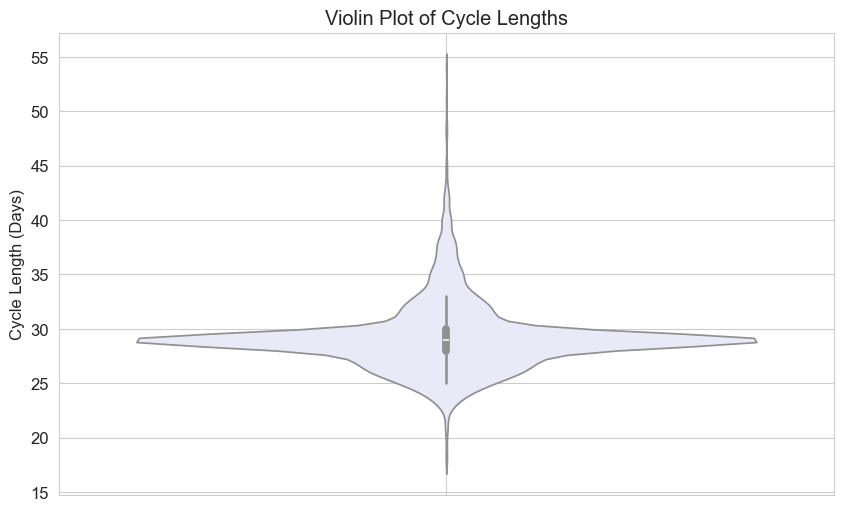

In [8]:
# Violin plot for cycle length
plt.figure(figsize=(10, 6))
sns.violinplot(y=df['cycle_length'], color=palette[4])
plt.title('Violin Plot of Cycle Lengths')
plt.ylabel('Cycle Length (Days)')
plt.grid(True)
plt.show()

### Insights on Violin Plot

The violin plot combines box plot and density plot features, showing the distribution shape of cycle lengths. It provides a fuller picture of data density, revealing modes and tails that histograms might obscure.

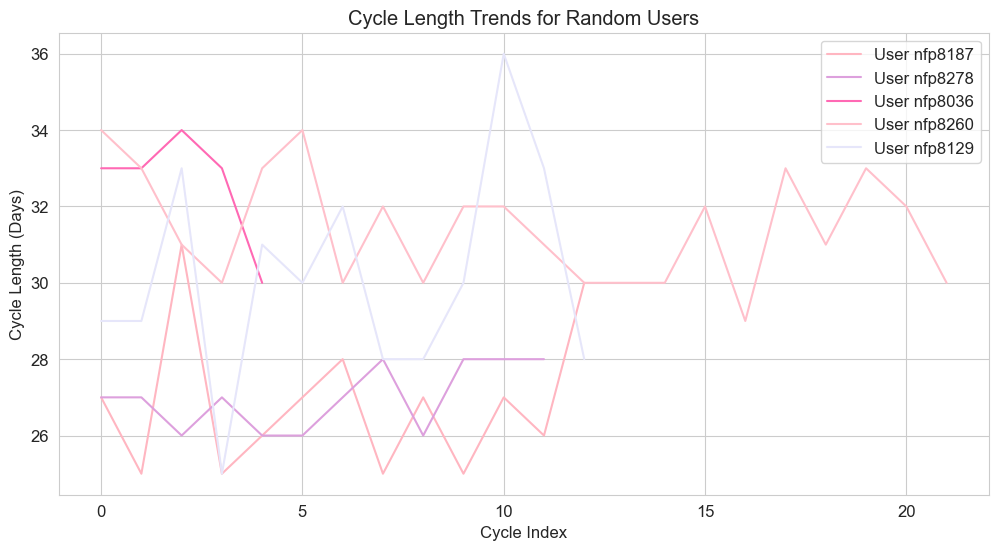

In [9]:
# Line plot of cycle length trend for random users with multiple cycles
users_with_multiple = df.groupby('ClientID').filter(lambda x: len(x) > 1)['ClientID'].unique()
if len(users_with_multiple) > 0:
    random_users = np.random.choice(users_with_multiple, size=min(5, len(users_with_multiple)), replace=False)
    plt.figure(figsize=(12, 6))
    for user in random_users:
        user_data = df[df['ClientID'] == user].reset_index()
        sns.lineplot(data=user_data, x=user_data.index, y='cycle_length', label=f'User {user}')
    plt.title('Cycle Length Trends for Random Users')
    plt.xlabel('Cycle Index')
    plt.ylabel('Cycle Length (Days)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No users with multiple cycles found.")

### Insights on Cycle Trends

For users with multiple recorded cycles, this plot shows individual trends. Consistent lines suggest stable cycles, while erratic ones indicate variability, which is important for personalized predictions.

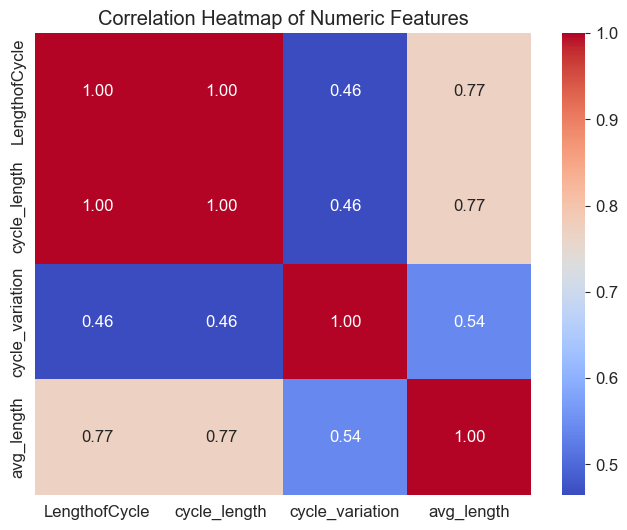

In [10]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Insights on Correlations

The heatmap displays correlations between numeric features. Strong correlations (e.g., between cycle_length and avg_length) are expected, while others may reveal underlying relationships useful for modeling.

## Explanation of Menstrual Cycle Variability

Menstrual cycle variability refers to the differences in cycle lengths and patterns among individuals and within the same person over time. Factors like age, stress, diet, exercise, and health conditions (e.g., PCOS) influence this. Understanding variability is key for accurate predictions and early detection of irregularities.

## Conclusion

EDA completed — ready for time series modeling. The visualizations provide a solid foundation for building predictive models in the RituCare project.